# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [2]:
data_dir = "ATnT/"
category = [f"s{i}" for i in range(1,41)]

img_dir = {}
for cat in category:
    path = data_dir + cat
    img_dir[cat] = []
    for img in os.listdir(path):
        img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_arr = img_arr.reshape((1,img_arr.shape[0]*img_arr.shape[1]))
        img_dir[cat].append(img_arr)

In [3]:
#we are taking 80-20 split
X_train, X_test = np.zeros((1,10304)), np.zeros((1,10304))
y_train, y_test = [], []
for cat in category:
    random.shuffle(img_dir[cat])
    for i in range(2):
        X_test = np.concatenate([X_test, img_dir[cat][i]])
        y_test.append(cat)
    for i in range(2,10):
        y_train.append(cat)
        X_train = np.concatenate([X_train, img_dir[cat][i]])
        
X_test = X_test[1:,:]
X_train = X_train[1:,:]
y_train, y_test = np.array(y_train), np.array(y_test)
X_train.shape

(320, 10304)

#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

1. calculate mean of each feature and subtract it from the given image or from training set.
2. We then calculate covariance matrix to determine the similarities bewteen all the features.
3. We then get eigen values and eigen vectors for the covariance matrix
4. we take k eigen vectors on the basis of sorted eigen values in decresing order because they capture the most variance of data.

This method does the following steps and will return top k eigen vectors as they capture highest amount of data variance.

In [4]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
# due to time constraint I am returning all the eigen vectors,
# instead I'm returning all eigen vectors and will create new function that does it and when we call
# principalComponentsAnalysis function we will get the components.

def pCA(X):
    X_mu = X - np.mean(X, axis=0)
    covariance = np.cov(X_mu.T)
    eigen_values, eigen_vectors = np.linalg.eigh(covariance)
    eigens = []
    for i in range(len(eigen_values)):
        eigens.append(eigen_vectors[:,i])
    eigens.reverse()
    return eigens


eigens = pCA(X_train)
eigens = np.array(eigens)
eigens.shape

(10304, 10304)

In [5]:
def principalComponentAnalysis(X, number_of_components):
    eigenfaces = []
    for i in range(number_of_components):
        eigenfaces.append(eigens[i])
    return np.array(eigenfaces)

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.
1. we calculate mean face and then subtract it from given images.
2. We take take dot product to calculate image in new vector space/ dimensions given by PCA
3. We again take the dot prodcut with the above matrix and the transpose of eigen faces to go back tp higher dimensions.

In [6]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(X,eigenfaces):
    x_mu = X - np.mean(X, axis = 0)
    img_rec = np.dot(x_mu, eigenfaces.T)
    img_rec = np.dot(img_rec, eigenfaces)
    img_rec += np.mean(X, axis = 0)
    return img_rec

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

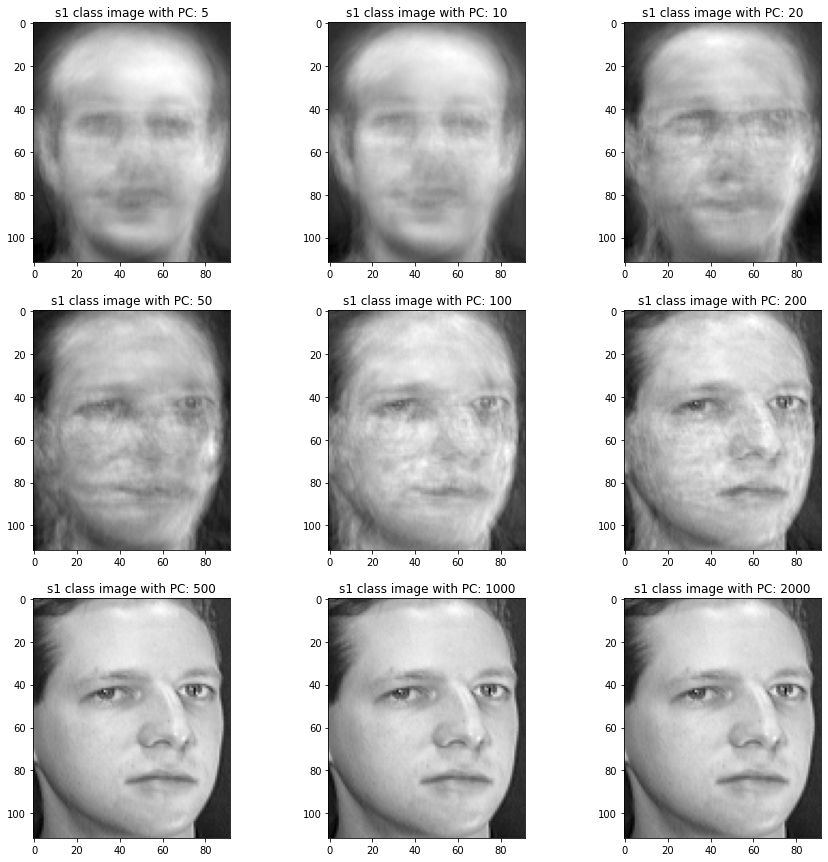

In [7]:
pc = [5,10,20,50,100,200,500,1000,2000]
images = []
for i in pc:
    eigenfaces = principalComponentAnalysis(X_train, i)
    img_rec = imageReconstruction(X_train, eigenfaces)
    img = img_rec.reshape(40,8,112,92)
    images.append(img)
    

    
fig = plt.figure(figsize=(15,15))
columns = 3
rows = 3
for i in range(1, columns*rows+1):
    fig.add_subplot(rows, columns, i)
    plt.title(y_train[0]+" class image with PC: "+str(pc[i-1]))
    plt.imshow(images[i-1][0][0], cmap='gray')
plt.show()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [12]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def model(test, eigenface, mean_face, X_train, y_train):
    test = test - mean_face
    eigen_test = np.dot(test, eigenface.T)
    X_train = X_train - mean_face
    eigen_train = np.dot(X_train, eigenface.T)
    wgt = np.linalg.norm(eigen_train - eigen_test, axis=1)
    smallest_error_img = np.argmin(wgt)
    error = wgt[smallest_error_img]
    y_pred = y_train[smallest_error_img]
    return smallest_error_img, error, y_pred

In [13]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
mse = []
accuracy = []
pc = [5,10,20,50,100,200,500,1000,2000]

for k in pc:
    eigenface = principalComponentAnalysis(X_train, k)
    count = 0
    total_sq_err = 0
    for i, img in enumerate(X_test):
        sei, err, pred = model(img, eigenface, np.mean(X_train, axis=0), X_train, y_train)
        err = err/k
        total_sq_err += err**2
        if(pred==y_test[i]):
            count+=1
    mse.append(total_sq_err/X_test.shape[0])
    accuracy.append(count/X_test.shape[0])

In [20]:
# for i in range(len(pc)):
#     print(f"k: {pc[i]}, accuracy: {accuracy[i]}")

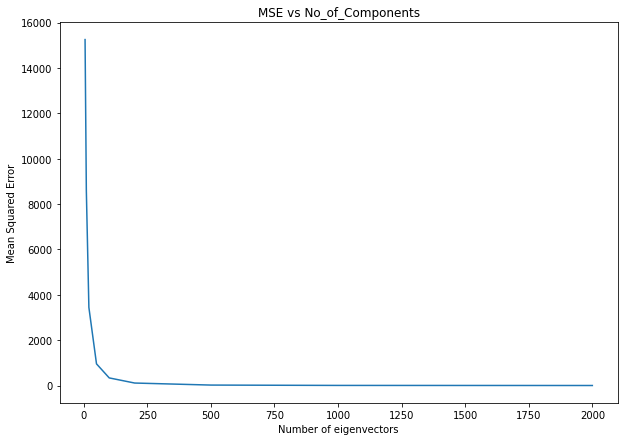

In [16]:
# Plot Number of eigenvectors vs Mean Square Error
plt.figure(figsize=(10,7))
plt.xlabel('Number of eigenvectors')
plt.ylabel('Mean Squared Error')
plt.title("MSE vs No_of_Components")
plt.plot(pc, mse)

plt.show()

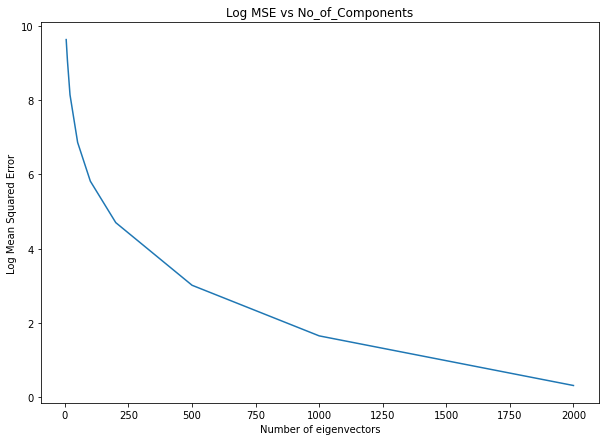

In [18]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
log_mse = []
for i in mse:
    log_mse.append(np.log(i))
    
plt.figure(figsize=(10,7))
plt.xlabel('Number of eigenvectors')
plt.ylabel('Log Mean Squared Error')
plt.title("Log MSE vs No_of_Components")
plt.plot(pc, log_mse)

plt.show()

Summarise your observations on the plots and accuracies

**Answer:**
On looking on above plots we can say that there comes a point after which the decrease in error becomes negligible as when we take top most  eigen vectors what we do is capture the data variance and upto a certain point the variance captured on k increses when we increase but after a certain k i.e. number of components the amount of variance we capture is very little, hence it doesn't have any effect.

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**
Advantage:
1. Removes Correlated Features:
As it helps us calulate similarity between features it removes the similar features and then eigen value is very less and hence theya re not captured in PCA

2. It helps to improve visualization of data
3. It helps to reduce overfiting of data
4. It helps us capture more amount of data variance in low dimensions and hence solve curse of dimensionality

Disadvantage:
1. Information Loss: 

Although Principal Components try to cover maximum variance among the features in a dataset, if we don’t select the number of Principal Components with care, it may miss some information as compared to the original list of features.

2. Independent variables become less interpretable:

After implementing PCA on the dataset, your original features will turn into Principal Components. Principal Components are the linear combination of your original features. Principal Components are not as readable and interpretable as original features.

Disadvantage in context of face recognition:

1. Face recognition might sometime give wrong results as face recognition is best works in higher dimensions
2. PCA mostly have non-linear relationship, whereas facial image can have relationship between features